# Unified Plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"} #no scaling
#pi0scaling = {"val": 1, "suffix": "_pi0flat", "title": "0.759 pi0 Scaling"} #flat scaling
#pi0scaling = {"val": 2, "suffix": "_pi0e040", "title": r"$\pi^0$ scaling: [$1 - 0.40 \times E_\pi$]"} #energy-dependent


In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123 import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
print(ls.main_path)
main_path = ls.main_path
sys.path.append(main_path)

/Users/cerati/Notebooks/PELEE/


In [5]:
import scipy.stats

In [6]:
#which_sideband = ['np_far'       ,"farsideband"] # far-sideband 1eNp datasets
#which_sideband = ['0p_far'       ,"farsideband"] # far-sideband 1eNp datasets
#which_sideband = ['numu',"numu"] # numu NTuples [v41]
#which_sideband = ['2plus_showers',"farsideband"] # far-sideband 2+ shower datasets
which_sideband = ['np_sb_comb',"farsideband"] # combined far-sideband 1eNp and 2+ shower datasets
#which_sideband = ['opendata'     ,'opendata']    # open datasets (5e19 / 1e19)
#which_sideband = ['opendata'     ,'fakeset1']    # set1 fake dataset

In [7]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=False,
                           loadtruthfilters=True,
                           loadshowervariables=True,
                           loadnumuntuples=False,
                           loadnumuvariables=False,
                           loadfakedata=0,
                           USEBDT=True,
                           loadsystematics=True,
                           loadrecoveryvars=True)


Loading uproot files
['elec_pz', 'shr_phi', 'shr_tkfit_dedx_nhits_v_v', 'shr_score', 'shr_tkfit_nhits_Y', 'trkshrhitdist0', 'n_showers_contained', 'shr_tkfit_2cm_nhits_U', 'shr_energy_tot', 'shr_hits_u_tot', 'hits_ratio', 'shr_start_x', 'pi0truth_elec_etot', 'selected', 'secondshower_U_dot', 'trk_score', 'shr_start_z', 'trk_hits_max', 'shr_tkfit_dedx_v_v', 'secondshower_U_vtxdist', 'shr_tkfit_dedx_nhits_u_v', 'shr_hits_v_tot', 'shrclusdir1', 'trk_end_y_v', 'secondshower_V_dir', 'shr_tkfit_npointsvalid', 'shr_tkfit_dedx_Y', 'shr_energy_y_v', '_opfilter_pe_beam', 'isVtxInFiducial', 'shr_start_z_v', 'trk_hits_tot', 'npion', 'theta', 'reco_nu_vtx_sce_y', 'matched_E', 'hits_y', 'shr_dedx_U', 'shr_dedx_Y_cali', 'ccnc', 'shrclusfrac1', 'shr_distance', 'trk_phi', 'trkshrhitdist2', 'shr_hits_2nd', 'shr_px', 'interaction', 'shr_tkfit_2cm_dedx_V', 'shr_tkfit_gap10_dedx_Y', 'shr_tkfit_dedx_U', 'muon_e', 'trk_hits_2nd', 'shr1trk2moliereavg', 'shrsubclusters2', 'shrPCA1CMed_5cm', 'trk_theta', 'trk2s

/opt/miniconda3/envs/pelee/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/miniconda3/envs/pelee/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


number of data entries returned is :  (26390, 308)
number of data entries returned is :  (26390, 308)


In [8]:
import plotter
import unblinding_far_sideband
import importlib
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)

<module 'unblinding_far_sideband' from '/Users/cerati/Notebooks/PELEE/unblinding_far_sideband.py'>

In [21]:
plotter_runbyrun = {}
for run in [1, 2, 3, 123, 12]:
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)
    if (run==123): print(this_weights)

{'mc': 0.18692098092643053, 'nue': 0.0035507246376811595, 'lee': 0.0035507246376811595, 'ncpi0': 0.04931703810208483, 'ccpi0': 0.06922300706357215, 'dirt': 0.42848219862585885, 'ncnopi': 0.023655172413793103, 'nccpi': 0.010735524256651016, 'ccnopi': 0.030488888888888892, 'cccpi': 0.02264026402640264, 'eta': 0.028464730290456434, 'ext': 0.3784203448577458}


In [10]:
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

pvaluetypes = ['pvalue','pvaluediag','pvaluestatonly']

In [11]:
DETSYS = {'mc':True,'nue':True,'ccpi0':True,'ncpi0':True,'dirt':True,\
          'ncnopi':True,'nccpi':True,'ncpi0':True,'ccpi0':True}

#DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
#          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

# Single Variable Plotter

reco_e 10 (0.15, 1.55) Reconstructed Energy [ GeV ]


/Users/cerati/Notebooks/PELEE/plotter.py:310: RuntimeWarning: divide by zero encountered in true_divide
  return (data-mc)**2 / data
/Users/cerati/Notebooks/PELEE/plotter.py:502: RuntimeWarning: divide by zero encountered in true_divide
  ERR_STAT = 3. / ( 1./data + 2./mc )
/opt/miniconda3/envs/pelee/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


reco_e 0.0000 0.0001 0.0180


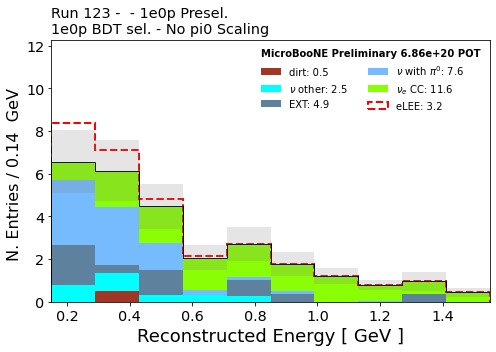

In [19]:
from unblinding_far_sideband import *

# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'ZP'
sel_key = 'ZPBDT'
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_key = 'NPBDTAllShr' #'None' 'NPVLAllShr' 'NPLAllShr' 'NPBDTAllShr' 'NPTAllShr'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

QUERY += ' and (bnbdata==0 or reco_e>0.85)'
QUERY += ' and (bnbdata==0)'
#print(QUERY)
        
#formatting can be improved..
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'reco_e',7,(0.85, 2.55),r"Reconstructed Energy [ GeV ]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',21,(0.15, 2.25),r"Reconstructed Energy [ GeV ]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',15,(0.15, 2.25),r"Reconstructed Energy [ GeV ]"
VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.15, 1.55),r"Reconstructed Energy [ GeV ]"

print(VARIABLE, BINS, RANGE, XTIT)

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    #kind="event_category",
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
    #asymErrs=True
)[0:3]

print('%s %.4f %.4f %.4f' % (VARIABLE, plotter_runbyrun[run].stats['pvaluestatonly'], plotter_runbyrun[run].stats['pvaluediag'], plotter_runbyrun[run].stats['pvalue']))

#ax1.set_ylim(0, ax1.get_ylim()[1]*1.8)

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)
#ax1.set_yscale('log')

plt.tight_layout()
fig.show()
#save_path = ls.plots_path
#fig.savefig(save_path + '_test_run3_trkpidcut.png', dpi=250)    
#fig.savefig(save_path + 'reco_e_1enp_10bins.pdf', dpi=250)    
#plt.close()
 

In [ ]:
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',21,(0.05, 2.15),r"reco energy"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',7,(0.05, 2.85),r"Reconstructed Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_score',6,(0,1),r"pi0 score"
#VARIABLE, BINS, RANGE, XTIT = 'nu_e',20,(0,2),r"true neutrino energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_e',10,(0,1),r"pi0 energy"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_score',5,(0.5,1),r"BDT $\pi^0$ score"
#VARIABLE, BINS, RANGE, XTIT = 'bkg_score',10,(0,1),r"bkg score"
#VARIABLE, BINS, RANGE, XTIT = 'nonpi0_score',6,(0,1),r"non-pi0 score"
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',1,(0.5, 1.5),"n showers contained"
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',10,(-0.5, 9.5),"n tracks contained"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',10,(-0.5, 9.5),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',15,(0, 10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_distance',20,(0, 40),"trk-shr distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'trkshrhitdist2',20,(0, 20),"trk-shr hit dist Y"
#VARIABLE, BINS, RANGE, XTIT = 'trkpid',15,(-1, 1),"trk PID"
#VARIABLE, BINS, RANGE, XTIT = 'secondshower_Y_nhit',20,(0, 100),"secondshower Y nhit"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_angle',10,(-1, 1),"trk-shr angle"
#VARIABLE, BINS, RANGE, XTIT = 'ismerged',2,(-0.5, 1.5),"is merged"
#VARIABLE, BINS, RANGE, XTIT = 'merge_bestdot',20,(-1, 1),"merge bestdot"
#VARIABLE, BINS, RANGE, XTIT = 'merge_bestdist',20,(0, 40),"merge bestdist"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.85,2.65),r"Reconstructed Energy [GeV]"

#VARIABLE, BINS, RANGE, XTIT = 'trkpid',21,(-1,1),"track LLR PID"
#VARIABLE, BINS, RANGE, XTIT = 'hits_ratio',20,(0,1),"shower hits/all hits"
#VARIABLE, BINS, RANGE, XTIT = 'shrmoliereavg',20,(0,50),"average Moliere angle [degrees]"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster',20,(0,40),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster',20,(0,20),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster2',10,(0.5,20.5),"N sub-clusters in sub-leading shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster2',10,(0.,20.),"N sub-clusters in sub-leading shower"
#VARIABLE, BINS, RANGE, XTIT = 'shr2pid',15,(-1, 1),"shr2 PID"
#VARIABLE, BINS, RANGE, XTIT = 'tk1sh2_distance',20,(0, 100),"trk1-shr2 distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_score',10,(0,0.5),r"shr2 score"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_id',10,(-0.5,9.5),r"shr2 id"
#VARIABLE, BINS, RANGE, XTIT = 'shrsubclustersold',20,(0,40),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'deltashrsbcfix',21,(-10.5,10.5),"subcluster-shrsubclustersfix"
#VARIABLE, BINS, RANGE, XTIT = 'deltashr2sbcfix',21,(-10.5,10.5),"subcluster-shr2subclustersfix"
#VARIABLE, BINS, RANGE, XTIT = 'trkfit',10,(0,1.0),"Fraction of Track-fitted points"
#VARIABLE, BINS, RANGE, XTIT = 'CosmicIPAll3D',20,(0,200),"CosmicIPAll3D [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_distance',12,(0,6),"trk-shr distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',15,(0,10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_angle',20,(-1,1),"cos(trk-shr angle)"
#VARIABLE, BINS, RANGE, XTIT = 'shr_trk_len',20,(0,400),"shr trk len [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_nhits',20,(0,1000),"shr2 nhits"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_energy',20,(0,250),"shr2 energy"

#VARIABLE, BINS, RANGE, XTIT = 'trk_len',20,(0,200),"trk len [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'shr12_cos_p1_dstart',20,(-1,1),"cos(shr1_dir,shr2_start-shr1_start)"
#VARIABLE, BINS, RANGE, XTIT = 'shr12_cos_p1_dstart',20,(0.8,1),"cos(shr1_dir,shr2_start-shr1_start)"

#VARIABLE, BINS, RANGE, XTIT = 'is_shr2splt',2,(-0.5,1.5),"is shr2splt"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk1bad',2,(-0.5,1.5),"is trk1bad"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk2srtshr',2,(-0.5,1.5),"is trk2srtshr"
#VARIABLE, BINS, RANGE, XTIT = 'is_shr2prtn',2,(-0.5,1.5),"is shr2prtn"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk1embd',2,(-0.5,1.5),"is trk1embd"
#VARIABLE, BINS, RANGE, XTIT = 'trk_distance',10,(0, 300),"trk-vtx distance"
#VARIABLE, BINS, RANGE, XTIT = 'trk_len',20,(0, 400),"trk len"

#VARIABLE, BINS, RANGE, XTIT = 'sh1sh2_distance',20,(0,200),"sh1sh2 distance [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',12,(0,252),"vtx x [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',12,(-120,120),"vtx y [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',12,(0,996),"vtx z [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'protonenergy',12,(0,0.6),"proton kinetic energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_theta',21,(0,3.14),r"Shower $\theta$"
#VARIABLE, BINS, RANGE, XTIT = 'trk_theta',21,(0,3.14),r"Track $\theta$"

In [ ]:
# store text files with selected events (needed input to produce SBNFit NTuples)

# thruth-cut on MC sample to avoid double counting with truth-filters (i.e. ccpi0, ncpi0, cccpi, ...)
NU_Q = "~(abs(nu_pdg) == 12 & ccnc == 0)"
NU_Q += " & ~(mcf_np0==1 & mcf_nmp==0 & mcf_nmm==0 & mcf_nem==0 & mcf_nep==0)"
NU_Q += " & ~(mcf_pass_ccpi0==1)"
NU_Q += " & ~(mcf_pass_ccnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_ncnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_cccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_nccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"


print (ls.ntuple_path)

for key, df in samples.items():
    #print ('sample : ',key)
    #continue
    fout = open(ls.ntuple_path+'SBNFit/'+key+'.txt','w')
    dfsel = df.query(QUERY)
    if (key == 'mc'):
        dfsel = dfsel.query(NU_Q)
    if (key != 'data'):
        print ('weight for sample %s is %.05f'%(key,this_weights[key]))
    print ('sample %s has %i selected entries'%(key,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run']
        sub = row['sub']
        evt = row['evt']
        fout.write('%i %i %i \n'%(run,sub,evt))
    fout.close()

In [ ]:
# just a simple check to verify there are no NaN in data
samples['data'].columns[samples['data'].isna().any()].tolist()

In [ ]:
#print(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]])#,"pi0_score"
#samples['data'].query(QUERY)[["run","sub","evt","reco_e","n_showers_contained","n_tracks_contained","tksh_distance","shr_tkfit_dedx_max","trkpid","hits_ratio","trkfit","tksh_angle","subcluster","shrmoliereavg","trkshrhitdist2","shr_trk_len","shr_score","pi0_score","nonpi0_score"]] 
samples['data'].query(QUERY)[["run","sub","evt","reco_e","n_showers_contained","n_tracks_contained","tksh_distance","shr_tkfit_dedx_max","trkpid","pi0_score","nonpi0_score"]] 

In [ ]:
#print(samples['data'].query(QUERY)[["run","sub","evt"]])
#QUERY=" and ".join([HIGH_ENERGY_EXT,BDTCQ])
print(QUERY)
print(len(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]]))
pd.set_option('display.max_rows', 100)
print(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]])from significance_calculator import significanceCalculator

this_cov = plotter_runbyrun[run].cov + plotter_runbyrun[run].cov_mc_stat
expected_bin_contents = {'bg': out[3][0][-1],
                         'signal': np.zeros(out[3][0][-1].shape)}
observed_bin_contents = plotter_runbyrun[run].data
this_pot = pot_data_unblinded[which_sideband[1]][run][0]

my_signif = significanceCalculator(expected_bin_contents, pot=this_pot)
my_signif.setCovarianceMatrix(this_cov, is_cov='cov')

fig, ax = my_signif.testStatisticsWithData(0, 1, 
                                           observed_bin_contents, 
                                           chi2_pdf_superimposed=True, 
                                           n_toy=100000, 
                                           n_bins=100, 
                                           range=[0,40],
                                           title=f'Run {run}, {XTIT}, N bins = {BINS}\n',
                                           test_stat='chi2_cnp')

# Multiple variable plotting

In [ ]:
from unblinding_far_sideband import *

dirappend = ""

#plot_variables = [('reco_e',7,(0.05,2.85),r"Reconstructed Energy [GeV]","coarse")]

#plot_variables = [
#                  ('shrmoliereavg',10,(0,10),"average Moliere angle [degrees]","zoomed"),
#                  ('subcluster',20,(0,80),"N sub-clusters in shower","extended"),
#                  ('tksh_distance',12,(0,6),"trk-shr distance [cm]","zoomed"),
#                  ('nonpi0_score',6,(0,1.0),"BDT non-$\pi^0$ score"),
#                  ('pi0_score',6,(0,1.0),"BDT $\pi^0$ score"),
#                  ('bkg_score',10,(0,1.0),"1e0p BDT score"),
#                  ('reco_e',7,(0.05,2.85),r"Reconstructed Energy [GeV]","coarse"),
#                  ('reco_e',21,(0.05,2.15),r"Reconstructed Energy [GeV]"),
#                  ('reco_e',20,(0.05,3.05),r"Reconstructed Energy [GeV]","extended"),
#]
#plot_variables = kinematic_variables
#plot_variables = energy_variables

# choose sideband, preselection, and selection(s)
# find defintions in unblinding_far_sideband.py
sdb_key = 'HiEext'
pre_key = 'NPOneShr'
sel_keys = ['None','NPVL','NPL','NPBDT'] #['None','NPVL','NPL','NPBDT','NPT']
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_keys = ['None','NPVLAllShr','NPLAllShr','NPBDTAllShr','NPTAllShr'] #['None','NPVLAllShr','NPLAllShr','NPBDTAllShr','NPTAllShr']
#sdb_key = 'LPID'
#pre_key = 'NP'
#sel_keys = ['None','NPVL','NPL']#
runs = [123] #[1,2,3,12,123]

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]

for run in runs:
    for sel_key in sel_keys:
        sel =  selection_categories[sel_key]
        print('\nRun %i, %s, %s, %s'%(run, sideband['dir'], preselection['dir'], sel['dir']))
        if (which_sideband[1] != "opendata"):
            this_folder = ls.plots_path+'PELEE_far_sideband_runbyrun'+dirappend+'/'
        else:
            this_folder = ls.plots_path+'PELEE_opendata/'
        this_folder += 'run_{}/'.format(run)
        this_folder += '{}_{}_{}'.format(sideband['dir'], preselection['dir'], sel['dir'])
        this_folder += (pi0scaling["suffix"]+'/')
        !mkdir -p $this_folder

        this_query = ""
        for query in [sideband['query'],preselection['query'],sel['query']]:
            if query is None: continue
            if this_query: this_query += ' and '
            this_query += query
        if run in [1, 2, 3, 12]:
            this_query += f' and run{run}==True'

        #formatting can be improved..
        this_title = ""
        for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
            if text is None: continue
            this_title += text

        pvalues = [[] for _ in range(len(pvaluetypes))]
        
        for plot_variable in plot_variables:
            VARIABLE, BINS, RANGE, XTIT = plot_variable[0:4]
            #if VARIABLE != 'tksh_angle': continue
            #if len(plot_variable)>4 or VARIABLE not in TRAINVAR: continue
            print(VARIABLE, BINS, RANGE, XTIT)
            fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
                VARIABLE,   
                query=this_query,
                kind="event_category",
                draw_sys=True,
                stacksort=3,
                title=XTIT,
                bins=BINS,
                range=RANGE,
            )[0:3]

            if len(plot_variable) == 6:
                if plot_variable[5] is True:
                    ax1.set_yscale('log')
            else:
                ax1.set_ylim(0, ax1.get_ylim()[1]*1.8) 

            ax1.set_title(this_title, loc='left')

            plt.tight_layout()
            save_path = this_folder+VARIABLE
            if len(plot_variable) >= 5:
                save_path += ('_' + plot_variable[4])
            fig.savefig(save_path + '.pdf', dpi=250)    
            plt.close()
            # store pvalues
            if len(plot_variable)==4 and VARIABLE in TRAINVAR:
                for idx, pvt in enumerate(pvaluetypes):
                    pvalues[idx].append(plotter_runbyrun[run].stats[pvt])
            #print ('%s %.04f'%(VARIABLE,plotter_runbyrun[run].stats['chisqstatonly']))
            print('%s %.4f %.4f %.4f' % (VARIABLE, plotter_runbyrun[run].stats['pvaluestatonly'], plotter_runbyrun[run].stats['pvaluediag'], plotter_runbyrun[run].stats['pvalue']))
        # make pvalue plots
        #print(pvalues)
        for idx, pvt in enumerate(pvaluetypes):
            if len(pvalues[idx])!=16: continue
            plt.figure(figsize=(9, 7))
            plt.hist(pvalues[idx], bins=10, range=(0,1))
            plt.title(this_title, loc='left')
            plt.xlabel(pvt)
            plt.ylabel("number of BDT input variables")
            plt.savefig(this_folder + pvt + '.pdf', dpi=250)
            plt.close()

In [ ]:
samples['data'].query(QUERY)[["run","sub","evt","reco_e","pi0_score","nonpi0_score","n_showers_contained","n_tracks_contained","reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z"]]